In [3]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
from data_curation import Normalization
from itertools import compress
import importlib
import cv2

# importlib.reload(pupillometry2_0_commons)
nm=Normalization()

EXP_IMAGES_PATH=Path(r'original-images')


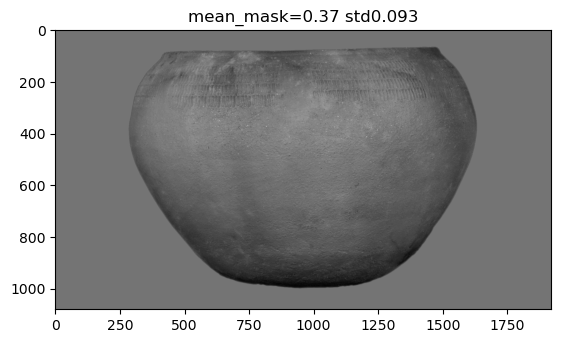

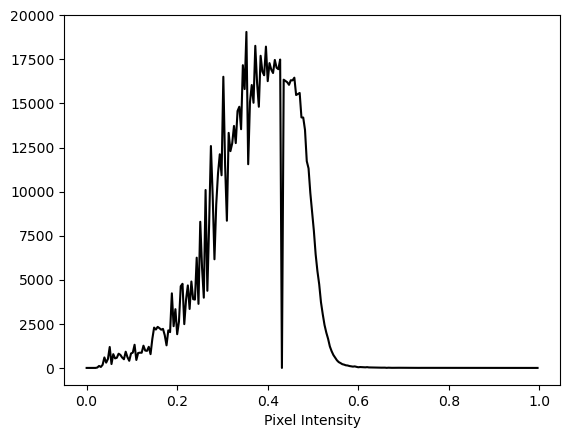

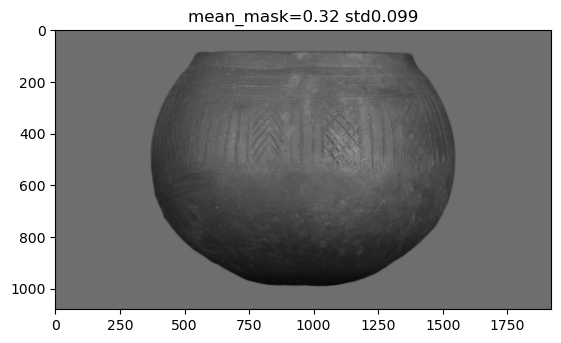

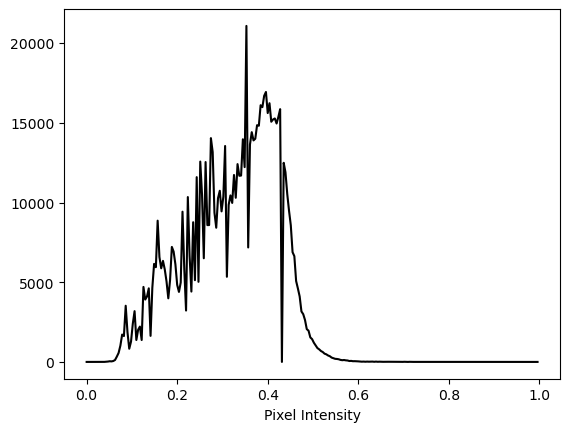

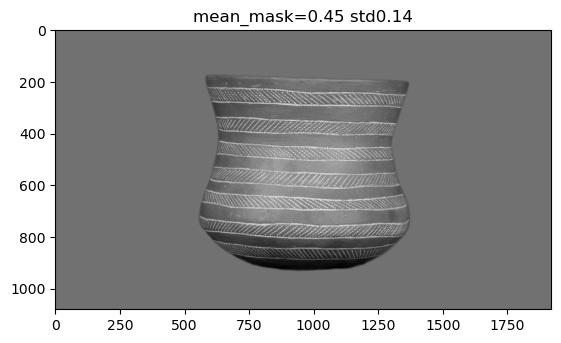

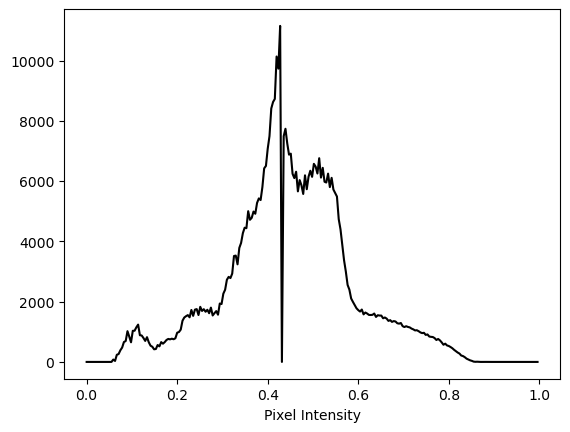

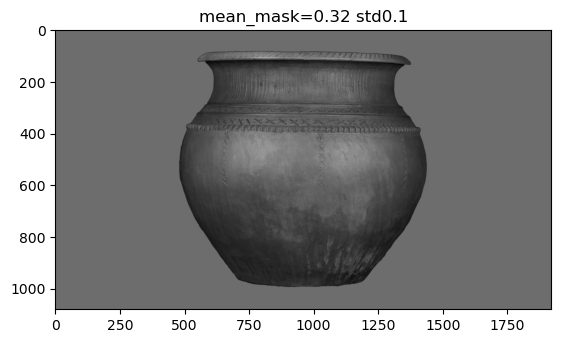

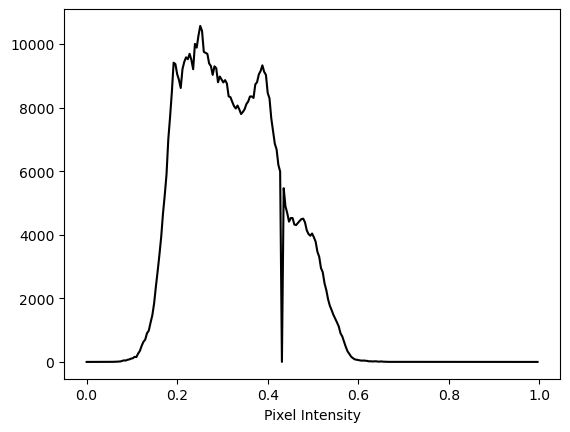

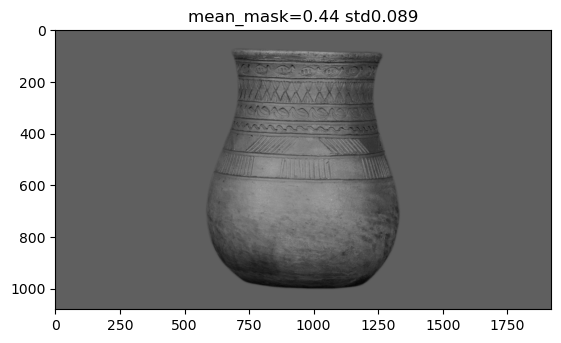

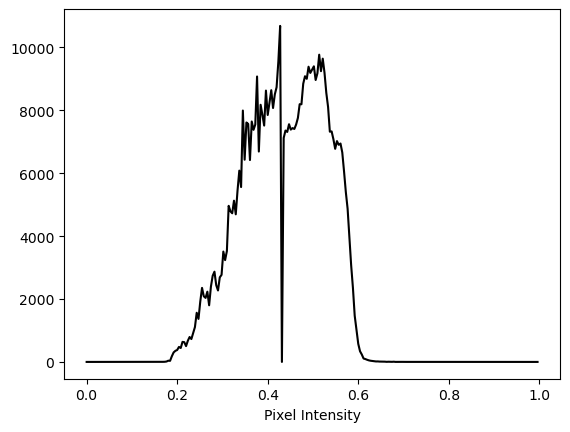

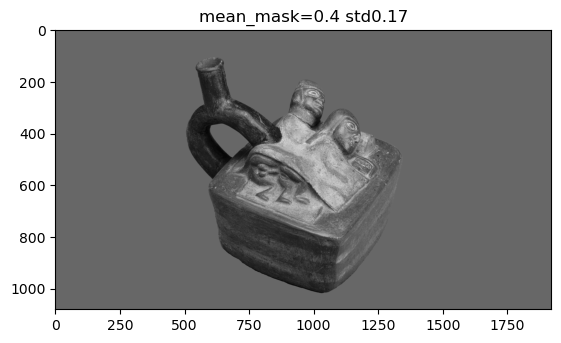

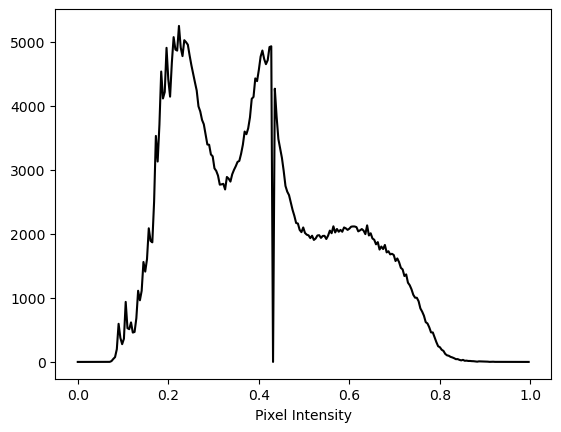

TypeError: Image data of dtype object cannot be converted to float

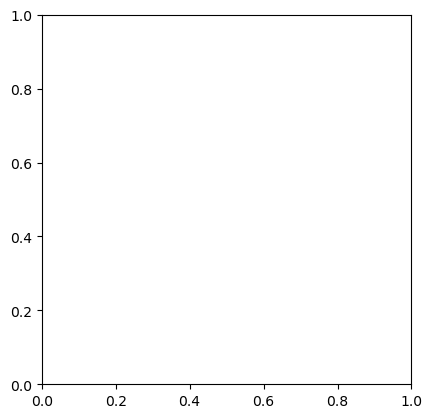

In [2]:
%matplotlib inline
images=[]
images_list=os.listdir(EXP_IMAGES_PATH)
# images_list.remove('assets.txt')
n_images = len(images_list)
images_strip=list(map(lambda x: x.split('.')[0].split('_')[0],images_list)) #remove .tiiff and '_'
data_dict=dict([('assets',[]),('mean_lum_mask',[]),('std_lum_mask',[]),('mean_lum',[]),('std_lum',[])])

for  filename,images_stripped in zip(images_list,images_strip):
    im = cv2.imread(str(EXP_IMAGES_PATH.joinpath(filename)),cv2.IMREAD_GRAYSCALE)
    fig1,ax1=plt.subplots(1,)
    ax1.imshow(im,cmap='gray')
    #remove background
    background_color = (110)  # Example: Red background color


    # Compute the mask for the background color
    mask = cv2.inRange(im, background_color, background_color)


    # Apply the mask to remove the background color
    image_removed = cv2.bitwise_and(im, im, mask=~mask)

    # Convert pixel values to the range of 0 to 1
    image_normalized = image_removed.astype(np.float32) / 255.0

    # Apply the mask to the normalized image
    image_normalized_masked = cv2.bitwise_and(image_normalized, image_normalized, mask=~mask)

 # Calculate the histogram with bins between 0 and 1
    hist, bins = np.histogram(image_normalized[image_normalized>0], bins=np.linspace(0, 1, num=256))
    
    # Plot the histogram
    
    fig2,ax2=plt.subplots(1,)
    plt.plot(bins[:-1], hist, color='black')
    plt.xlabel('Pixel Intensity')
    ax1.set_title(f'mean_mask={np.mean(image_normalized[image_normalized>0]):.2} std{np.std(image_normalized[image_normalized>0]):.2}')
    plt.show()

    #ADD DATA to dataframe
    data_dict['assets'].append(images_stripped)
    data_dict['mean_lum_mask'].append(np.mean(image_normalized[image_normalized>0]))
    data_dict['std_lum_mask'].append(np.std(image_normalized[image_normalized>0]))
    data_dict['mean_lum'].append(np.std(image_normalized))
    data_dict['std_lum'].append(np.std(image_normalized))


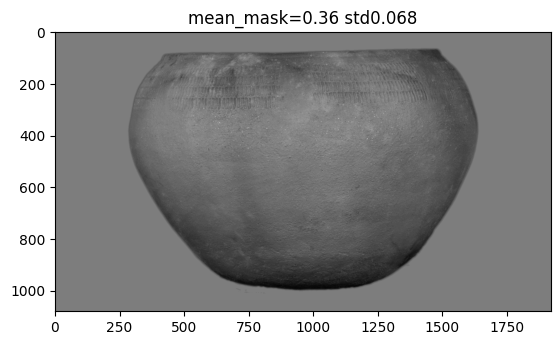

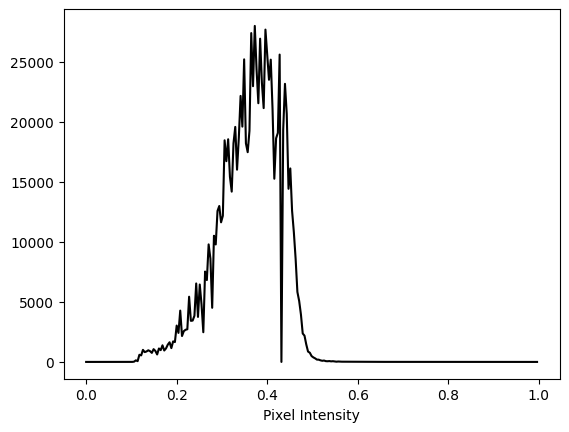

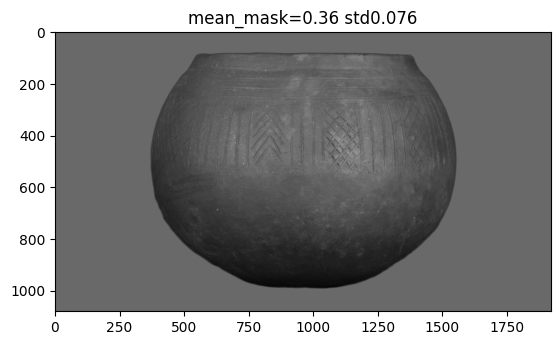

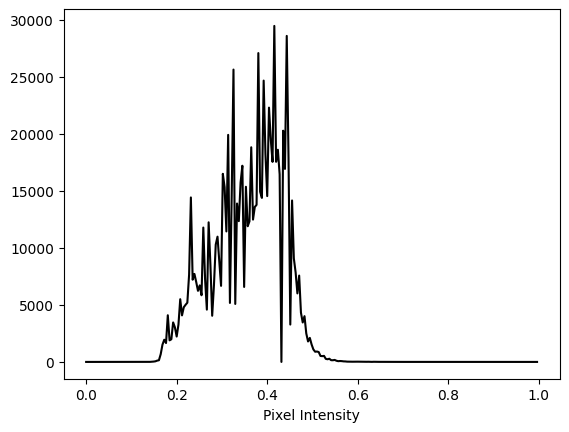

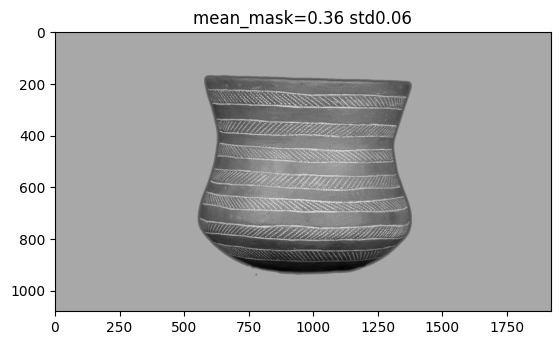

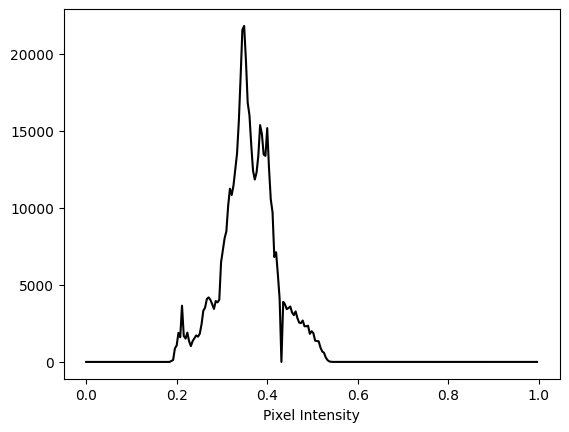

In [66]:
%matplotlib inline
EXP_IMAGES_PATH=Path(r'matched-images')

images=[]
images_list=os.listdir(EXP_IMAGES_PATH)
# images_list.remove('assets.txt')
n_images = len(images_list)
images_strip=list(map(lambda x: x.split('.')[0].split('_')[0],images_list)) #remove .tiiff and '_'
data_dict=dict([('assets',[]),('mean_lum_mask',[]),('std_lum_mask',[]),('mean_lum',[]),('std_lum',[])])

for  filename,images_stripped in zip(images_list,images_strip):
    im = cv2.imread(str(EXP_IMAGES_PATH.joinpath(filename)),cv2.IMREAD_GRAYSCALE)
    fig1,ax1=plt.subplots(1,)
    ax1.imshow(im,cmap='gray')
    #remove background
    background_color = (110)  # Example: Red background color


    # Compute the mask for the background color
    mask = cv2.inRange(im, background_color, background_color)


    # Apply the mask to remove the background color
    image_removed = cv2.bitwise_and(im, im, mask=~mask)

    # Convert pixel values to the range of 0 to 1
    image_normalized = image_removed.astype(np.float32) / 255.0

    # Apply the mask to the normalized image
    image_normalized_masked = cv2.bitwise_and(image_normalized, image_normalized, mask=~mask)

 # Calculate the histogram with bins between 0 and 1
    hist, bins = np.histogram(image_normalized[image_normalized>0], bins=np.linspace(0, 1, num=256))
    
    # Plot the histogram
    
    fig2,ax2=plt.subplots(1,)
    plt.plot(bins[:-1], hist, color='black')
    plt.xlabel('Pixel Intensity')
    ax1.set_title(f'mean_mask={np.mean(image_normalized[image_normalized>0]):.2} std{np.std(image_normalized[image_normalized>0]):.2}')

    #ADD DATA to dataframe
    data_dict['assets'].append(images_stripped)
    data_dict['mean_lum_mask'].append(np.mean(image_normalized[image_normalized>0]))
    data_dict['std_lum_mask'].append(np.std(image_normalized[image_normalized>0]))
    data_dict['mean_lum'].append(np.std(image_normalized))
    data_dict['std_lum'].append(np.std(image_normalized))

In [67]:
%matplotlib qt
plt.imshow(image_removed)

In [68]:
df_lum=pd.DataFrame(data_dict)
df_lum.sort_values('mean_lum_mask')

,assets,mean_lum_mask,std_lum_mask,mean_lum,std_lum
1,Obj0109,0.357048,0.076171,0.183836,0.183836
2,Obj0110,0.360020,0.059957,0.161456,0.161456
0,Obj0108,0.360377,0.068093,0.186346,0.186346


In [69]:
df_lum.to_csv('assets_luminance.csv')

In [70]:
im = cv2.imread(str(EXP_IMAGES_PATH.joinpath(images_list[0])),cv2.IMREAD_GRAYSCALE)



# Convert pixel values to the range of 0 to 1
im = im.astype(np.float32) / 255.0

# Calculate the histogram
hist = cv2.calcHist([im], [0], None, [256], [0, 1])

# Plot the histogram
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Normalized Image Histogram')
plt.show()

In [71]:
%matplotlib inline
plt.imshow(im)

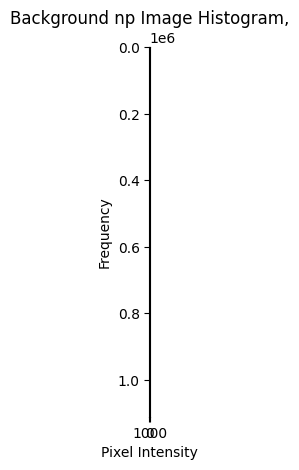

In [72]:
im = cv2.imread(str(EXP_IMAGES_PATH.joinpath(images_list[0])),cv2.IMREAD_GRAYSCALE)

#remove background
background_color = (110)  # Example: Red background color


# Compute the mask for the background color
mask = cv2.inRange(im, background_color, background_color)


# Apply the mask to remove the background color
image_removed = cv2.bitwise_and(im, im, mask=~mask)

# Convert pixel values to the range of 0 to 1
image_normalized = image_removed.astype(np.float32) / 255.0

# Apply the mask to the normalized image
image_normalized_masked = cv2.bitwise_and(image_normalized, image_normalized, mask=~mask)

# Calculate the histogram with bins between 0 and 1
hist, bins = np.histogram(image_normalized[image_normalized>0], bins=np.linspace(0, 1, num=256))

# Plot the histogram
plt.plot(bins[:-1], hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Background np Image Histogram,')
plt.show()

In [73]:
images_strip=[image.split('.')[0] for image in images_list] #remove .tiiff
#Dictionaries to create dataframes
data_dict=dict([(key,[None]) for key in event_strip])# dict with empty keys 


for i, filename in enumerate(images_list):
    im = cv2.imread(str(EXP_IMAGES_PATH.joinpath(filename)),cv2.IMREAD_GRAYSCALE)
    fig1,ax1=plt.subplots(1,)
    ax1.imshow(im)
    #remove background
    background_color = (110)  # Example: Red background color


    # Compute the mask for the background color
    mask = cv2.inRange(im, background_color, background_color)


    # Apply the mask to remove the background color
    image_removed = cv2.bitwise_and(im, im, mask=~mask)

    # Convert pixel values to the range of 0 to 1
    image_normalized = image_removed.astype(np.float32) / 255.0

    # Apply the mask to the normalized image
    image_normalized_masked = cv2.bitwise_and(image_normalized, image_normalized, mask=~mask)

    # Calculate the histogram with bins between 0 and 1
    hist, bins = np.histogram(image_normalized[image_normalized>0], bins=np.linspace(0, 1, num=256))
    
    # Plot the histogram
    
    fig2,ax2=plt.subplots(1,)
    plt.plot(bins[:-1], hist, color='black')
    plt.xlabel('Pixel Intensity')
    ax1.set_title(f'mean_mask={np.mean(image_normalized[image_normalized>0]):.2} mean{np.mean(image_normalized):.2}')
    plt.show()


NameError: name 'event_strip' is not defined